In [8]:
from utils import *
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
from distribution_fitting import LP3Fitting

font_size = 14
label_font_size = 18

font_style = "Arial"
mpl.rcParams['font.family'] = font_style
mpl.rcParams['font.size'] = font_size 

# Load systematic data

In [9]:
annual_maxima_csv = r"C:\ISYE6420\Homework\Project\data\Harricana_River_at_Amos.csv"

df = pd.read_csv(annual_maxima_csv)
df["zstd"] = -norm.ppf(df["Plotting_Position"])

# convert flow to array
data = df["Flow"].to_xarray()

Text(0, 0.5, 'Annual Exceedance Probability')

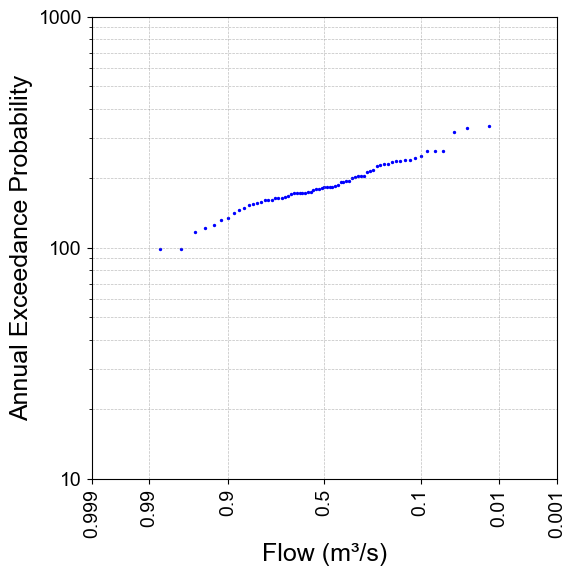

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(df['zstd'], df['Flow'], s=2, color='b', label='Annual Maxima')

# cut off values for major ticks, and their corresponding z-scores
aep_lst = [0.999, 0.99, 0.9, 0.5, 0.1, 0.01, 0.001]
x_ticks = [str(aep) for aep in aep_lst]
major_z_scores = [-norm.ppf(aep) for aep in aep_lst]

plt.xticks(major_z_scores, x_ticks, rotation = 90)
plt.grid(which='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.yscale('log')
plt.ylim(10, 1000)
plt.xlim(major_z_scores[0], major_z_scores[-1])

ax = plt.gca()
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter) 

# set labels for x and y axes
plt.xlabel('Flow (m³/s)', fontsize=label_font_size, fontname=font_style)
plt.ylabel("Annual Exceedance Probability", fontsize=label_font_size, fontname=font_style)

# Distribution fitting

In [11]:
lp3 = LP3Fitting(data)
result_lp3 = lp3.fit(method="Nelder-Mead", disp=False, tol=1e-12, max_iter=10000)
mu_lp3, sigma_lp3, gamma_lp3 = lp3.get_best_params(result_lp3, type = "MOM")
xi_lp3, beta_lp3, alpha_lp3 = lp3.get_best_params(result_lp3, type = "MLE")

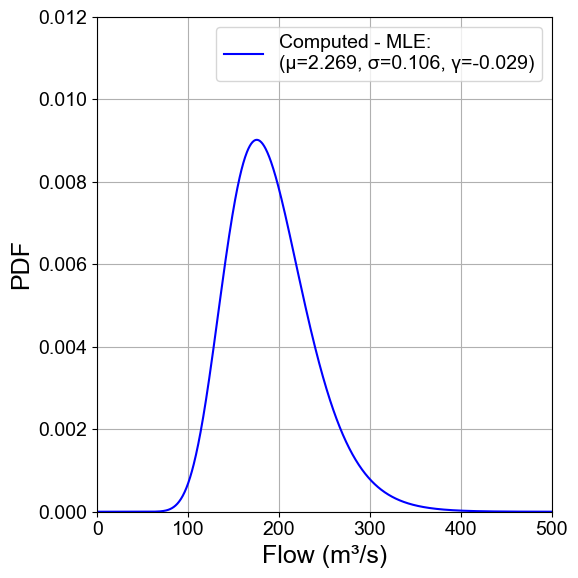

In [12]:
x_values = np.linspace(0.01, 500, 1000)
lp3_pdf_values = lp3_pdf(x_values, mu=mu_lp3, sigma=sigma_lp3, gamma_val=gamma_lp3)

# Plotting the PDF
plt.figure(figsize=(6, 6))
plt.plot(x_values, lp3_pdf_values, color = "blue", label=f"Computed - MLE: \n(μ={mu_lp3:.3f}, σ={sigma_lp3:.3f}, γ={gamma_lp3:.3f})")

plt.xlim(0, 500)
plt.ylim(0, 0.012)
plt.xlabel("Flow (m³/s)", fontsize=label_font_size, fontname=font_style)
plt.ylabel("PDF", fontsize=label_font_size, fontname=font_style)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\ISYE6420\Homework\Project\data\HRA\HRA_LP3_MLE.png", dpi=300)

# Flood quantile estimation

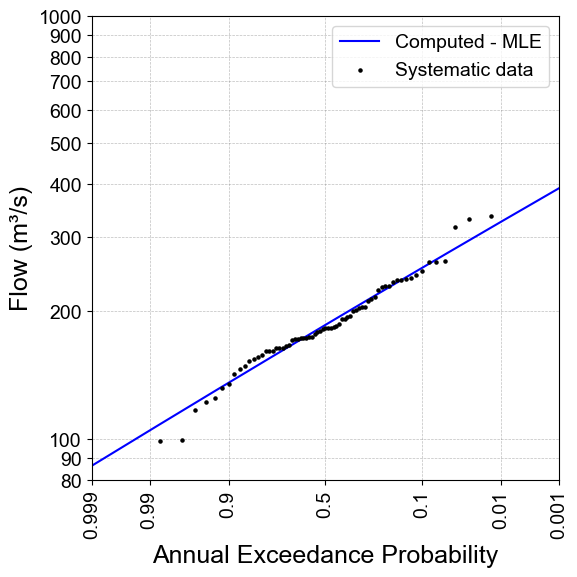

In [16]:
x_values = np.linspace(0.001, 0.999, 1000)
x_values_z_scores = [-norm.ppf(1 - x) for x in x_values]

# Calculate the quantiles for the LP3 distribution
flood_quantiles_lp3 = [lp3_ppf(x, mu=mu_lp3, sigma=sigma_lp3, gamma_val=gamma_lp3) for x in x_values]

plt.figure(figsize=(6, 6))
plt.plot(x_values_z_scores, flood_quantiles_lp3, color = "blue", label=f"Computed - MLE")
plt.scatter(df['zstd'], df['Flow'], s=5, color='black', label='Systematic data', zorder=10)

# cut off values for major ticks, and their corresponding z-scores
aep_lst = [0.999, 0.99, 0.9, 0.5, 0.1, 0.01, 0.001]
major_z_scores = [-norm.ppf(aep) for aep in aep_lst]
x_ticks = [str(aep) for aep in aep_lst]

plt.xticks(major_z_scores, x_ticks, rotation = 90)
plt.grid(which='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.yscale('log')
y_values = [80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y_ticks = [str(i) for i in y_values]
plt.yticks(y_values, y_ticks)

plt.xlim(major_z_scores[0], major_z_scores[-1])

ax = plt.gca()
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter) 

# set labels for x and y axes
plt.xlabel('Annual Exceedance Probability', fontsize=label_font_size, fontname=font_style)
plt.ylabel("Flow (m³/s)", fontsize=label_font_size, fontname=font_style)
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig(r"C:\ISYE6420\Homework\Project\data\HRA\HRA_flood_quantiles_MLE.png", dpi=300)